In [1]:
from kaggle_environments import make, evaluate
import numpy as np
import matplotlib.pyplot as plt

import os

Loading environment football failed: No module named 'gfootball'


In [2]:
from tournament_helper import *

In [6]:
tournament_agents = ["better_random.py", "greedy"]
tournament_labels = ["better_random.py", "greedy"]

ml_agents = os.listdir("tournament")
for agent in ml_agents:
    tournament_agents.append(f"tournament/{agent}/main.py")
    tournament_labels.append(agent)

print(tournament_agents)
print(tournament_labels)


['better_random.py', 'greedy', 'tournament/A01/main.py', 'tournament/A02/main.py', 'tournament/A03/main.py', 'tournament/A04/main.py', 'tournament/A05/main.py', 'tournament/A05TW/main.py', 'tournament/A06/main.py', 'tournament/A06TW/main.py', 'tournament/A07/main.py', 'tournament/A08/main.py', 'tournament/A09/main.py', 'tournament/A10/main.py', 'tournament/A11/main.py', 'tournament/A12/main.py']
['better_random.py', 'greedy', 'A01', 'A02', 'A03', 'A04', 'A05', 'A05TW', 'A06', 'A06TW', 'A07', 'A08', 'A09', 'A10', 'A11', 'A12']


In [12]:
point_estimate, std_dev = tournament(tournament_agents, num_episodes=50)

0/100.00, better_random.py vs better_random.py

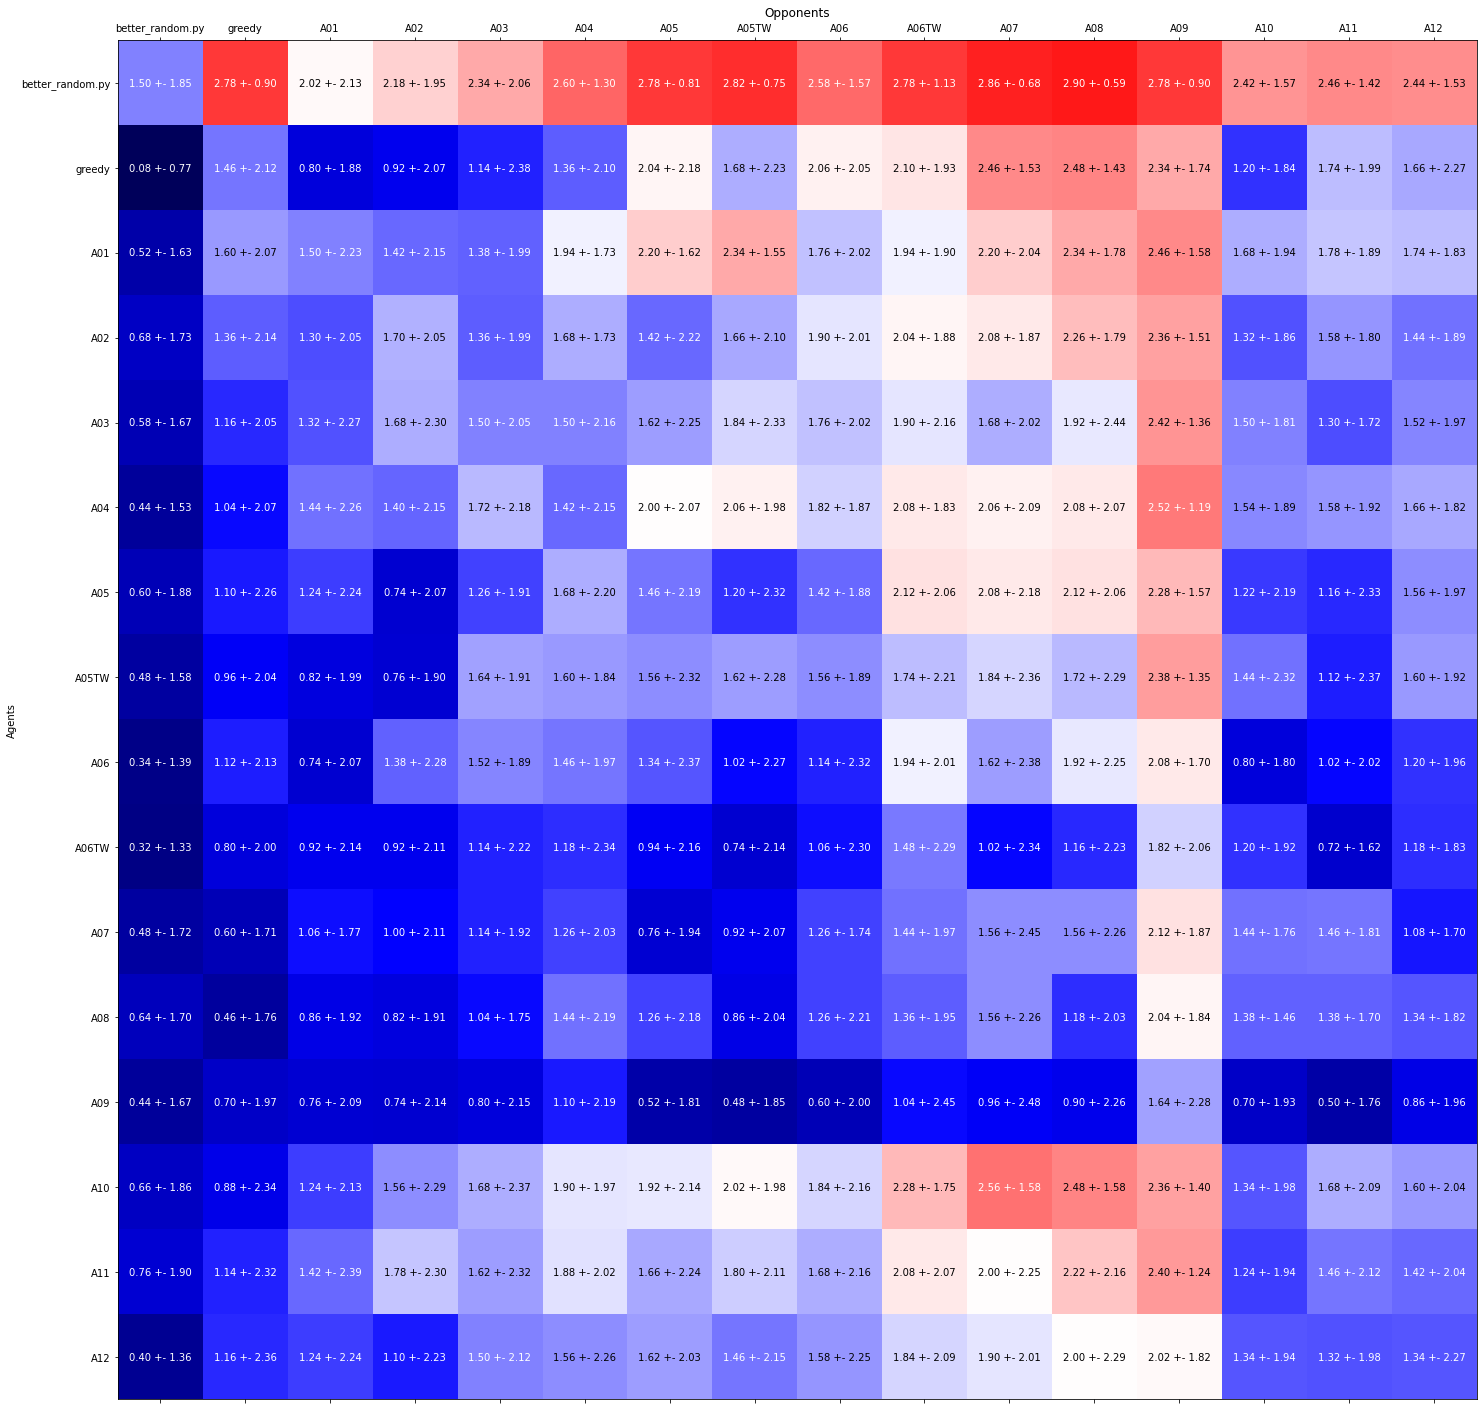

In [16]:
fig, ax = plt.subplots(figsize=(25, 25))
# Using matshow here just because it sets the ticks up nicely. imshow is faster.
ax.matshow(point_estimate, cmap='seismic', vmin=0, vmax=4)

ax.set_title("Opponents")
ax.set_ylabel("Agents")

for (i, j), z in np.ndenumerate(point_estimate):
    ax.text(j, i, f"{point_estimate[i][j]:.2f} +- {1.96 * std_dev[i][j]:.2f}", color="black" if abs(point_estimate[i][j] - 2) < 0.5 else "white", ha='center', va='center')

ax.set_xticks(range(len(point_estimate)))
ax.set_yticks(range(len(point_estimate)))
ax.set_xticklabels(tournament_labels)
ax.set_yticklabels(tournament_labels)

plt.show()


In [7]:
single_agent = "main.py"
single_point_estimate, single_std_dev = evaluate_agent_against_ensemble(single_agent, tournament_agents, num_episodes=20)

0/100.00, main.py vs better_random.py

<ipython-input-9-d4f7fe0bd828>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([single_agent])


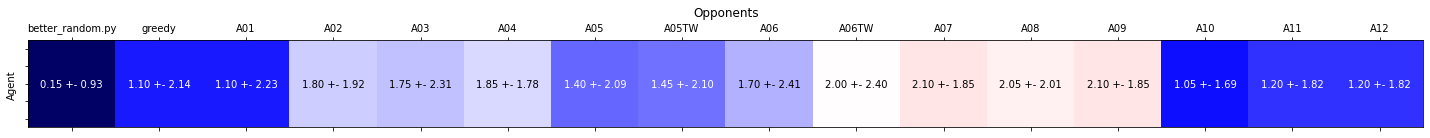

In [9]:
fig, ax = plt.subplots(figsize=(25, 5))
# Using matshow here just because it sets the ticks up nicely. imshow is faster.
ax.matshow([single_point_estimate], cmap='seismic', vmin=0, vmax=4)

ax.set_title("Opponents")
ax.set_ylabel("Agent")

for (i, j), z in np.ndenumerate([single_point_estimate]):
    ax.text(j, i, f"{single_point_estimate[j]:.2f} +- {1.645 * single_std_dev[j]:.2f}", color="black" if abs(single_point_estimate[j] - 2) < 0.5 else "white", ha='center', va='center')

ax.set_xticks(range(len(single_point_estimate)))
ax.set_xticklabels(tournament_labels)
ax.set_yticklabels([single_agent])

plt.show()


In [8]:
import main

main.agent

import better_random
better_random.agent(None, None)

'EAST'

In [9]:
from kaggle_environments import make
from kaggle_environments.envs.hungry_geese.hungry_geese import Action
import numpy as np
from shared.memory_manager import MemoryManager

env = make("hungry_geese", debug=False)

trainer = env.train([None, "greedy", "greedy", "greedy"])
possible_moves = [Action.NORTH.name, Action.EAST.name, Action.SOUTH.name, Action.WEST.name]

obs = []
observation = trainer.reset()
obs.append(observation)

done = False
while not done:
    action = np.random.choice(possible_moves)
    
    observation, reward, done, info = trainer.step(action)
    obs.append(observation)

print(obs)
print(MemoryManager.get_place(obs))


[{'remainingOverageTime': 60, 'step': 0, 'geese': [[65], [69], [14], [12]], 'food': [63, 15], 'index': 0}, {'remainingOverageTime': 60, 'step': 1, 'geese': [[64], [58], [25], [1]], 'food': [63, 15], 'index': 0}, {'remainingOverageTime': 60, 'step': 2, 'geese': [[], [47], [26], [2]], 'food': [63, 15], 'index': 0}]
[3. 0. 0. 0.]


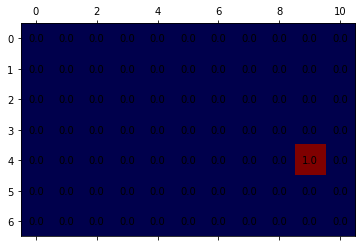

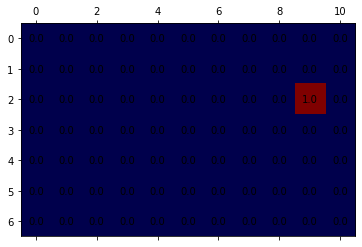

2

In [17]:
import matplotlib.pyplot as plt
import numpy as np

from DQN.model import Model
from shared.memory_manager import MemoryManager
from kaggle_environments.envs.hungry_geese.hungry_geese import Configuration
from kaggle_environments.envs.hungry_geese.hungry_geese import row_col

from shared.map import Map

model = Model()
model.set_config(Configuration({"columns": 11, "rows": 7}))

memory_manager = MemoryManager(-1, 0.99)
memory_manager.add_memory([obs[-3], 1, 1, 3, 0, obs[-2]], 1, 1)


trans_obs = memory_manager.last_episode[0][0]
map = Map(trans_obs, 11)
data = map.build_opponent_map(1)[1].reshape(7,11)
#data = map.build_opponent_map(0)[1].reshape(7,11)

fig, ax = plt.subplots()
# Using matshow here just because it sets the ticks up nicely. imshow is faster.
ax.matshow(data, cmap='seismic')

for (i, j), z in np.ndenumerate(data):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

plt.show()

map = Map(trans_obs, 11, flipped_left_right=False, flipped_up_down=True)
data = map.build_opponent_map(1)[1].reshape(7,11)
#data = map.build_opponent_map(0)[1].reshape(7,11)

fig, ax = plt.subplots()
# Using matshow here just because it sets the ticks up nicely. imshow is faster.
ax.matshow(data, cmap='seismic')

for (i, j), z in np.ndenumerate(data):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

plt.show()

map.transform_move_wrt_flipping(0)